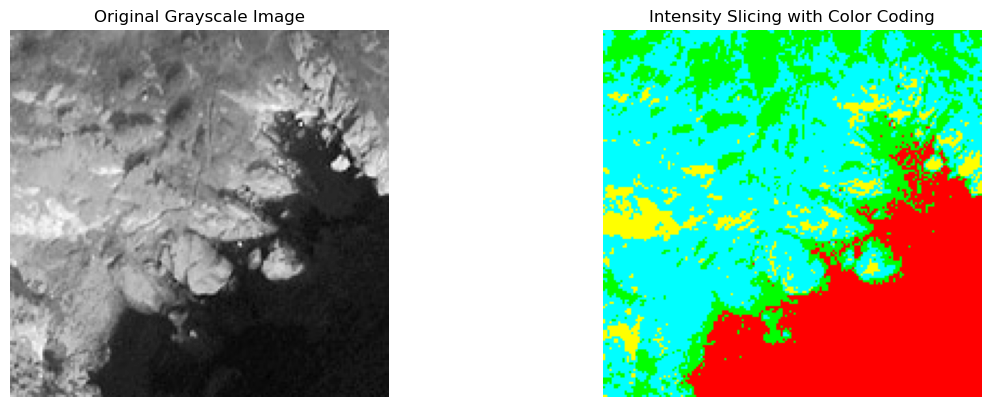

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Theory: Intensity Slicing and Color Coding
# Intensity slicing is a technique in image processing where the image's intensity values (grayscale levels)
# are divided into intervals, and each interval is mapped to a specific color.
# The goal is to highlight regions of the image that fall within certain intensity ranges, making it easier to
# visualize variations that might be hard to detect in the original grayscale image.
#
# The image is first converted into grayscale (if not already), and then specific intensity levels (or planes)
# are defined to slice the image into different regions. Each of these regions is then assigned a color,
# making it a pseudocolor image where different intensity ranges are represented by different colors.
# This method is often used in fields like medical imaging or remote sensing to enhance features.
#
# In this code, we load a grayscale image, define intensity slices, and apply a color map to visualize the 
# intensity slicing effect.

# Load a grayscale image
# Specify the path to the image
#image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Replace with your image path
#image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')
image_path = os.path.join(os.getcwd(), 'data', 'images', 'worldview-1.jpg') 

gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if gray_image is None:
    print("Error: Image not found!")
else:
    # Define the number of slices (this example uses 4 slices)
    num_slices = 4
    max_intensity = 255  # Maximum intensity value for 8-bit images

    # Create the slicing boundaries (equally spaced intensity intervals)
    slice_boundaries = np.linspace(0, max_intensity, num_slices + 1, dtype=int)

    # Create the color map with different colors for each slice (BGR format)
    colormap = [
        (0, 0, 255),  # Red
        (0, 255, 0),  # Green
        (255, 255, 0),  # Yellow
        (0, 255, 255)   # Cyan
    ]

    # Create an empty 3-channel color image (same size as grayscale, with 3 color channels)
    color_image = np.zeros((gray_image.shape[0], gray_image.shape[1], 3), dtype=np.uint8)

    # Apply intensity slicing and color coding
    for i in range(num_slices):
        # Create a mask for pixels within the current intensity range
        mask = (gray_image >= slice_boundaries[i]) & (gray_image < slice_boundaries[i + 1])

        # Assign the corresponding color to the pixels in the mask
        for j in range(3):  # Apply to the 3 color channels (BGR)
            color_image[:, :, j] = np.where(mask, colormap[i][j], color_image[:, :, j])

    # Plot the original grayscale image and the color coded image
    plt.figure(figsize=(12, 8))

    # Original Grayscale Image
    plt.subplot(2, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.axis("off")

    # Color-coded Image after Intensity Slicing
    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.title("Intensity Slicing with Color Coding")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
